# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn. En la primera sección analizaremos K-means y en la segunda DBScan


## 1. K-means

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image', cmap='nipy_spectral')

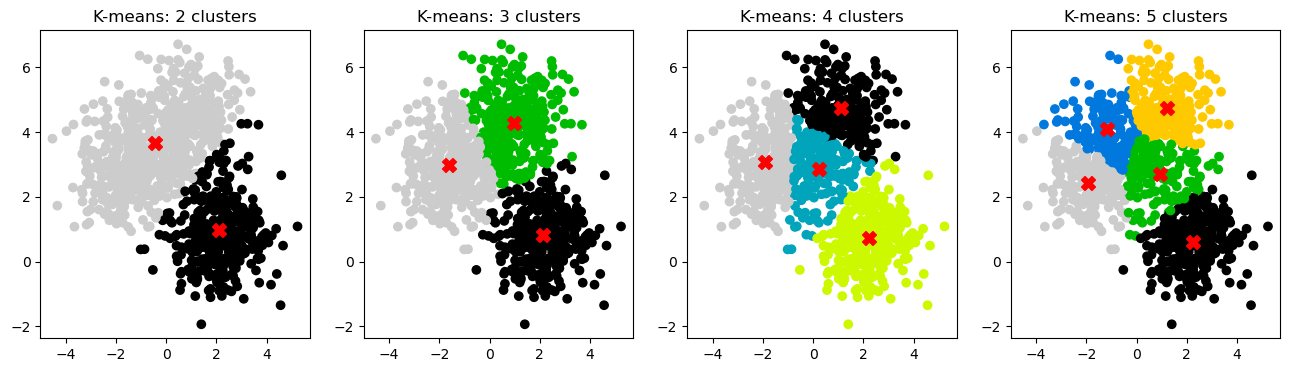

In [8]:
# Generaremos 3 blobs, cada uno con datos iguales. En total habran 1000 puntos distribuidos en estos blobs.
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Utilizaremos el algoritmo de KMeans para encontrar clusters en los datos
n_cols = 4
n_clusters_list = [2, 3, 4, 5]
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 4))
axes = axes.flatten()
for ax, n_clusters in zip(axes, n_clusters_list):
    # TODO: Encuentra los clusters utilizando el algoritmo de KMeans implementado en scikit-learn
    # ====== Start of solution =====
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_kmeans = model.fit_predict(X)

    # TODO: Grafica los datos usando scatter, recuerda que X = (x, y)
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans)

    # TODO: Lee la documentación de sklearn para obtener los centroides del modelo entrenado
    # y grafícalos con ax.scatter
    centroids = model.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='red')


    ax.set_title(f"K-means: {n_clusters} clusters")
plt.show()


En la sección anterior utilizamos 2, 3, 4 y 5 clusters para encontar patrones en los datos y los resultados se graficaron.

TODO: Contesta la siguiente pregunta

- ¿Cúal propuesta de clusters consideras la mejor y porqué?

Consideramos una mejor propuesta la de los 3 clusters ya que parece la más apropiada para la distribución de los datos generados en este caso. Es decir, hace mejor fit al modelo. Dividir los datos en 3 clusters permite visualizar más fácilmente la estructura de los blobs, evitando subdivisiones excesivas o muy simples que podrían dificultar poder ver la distribución de los datos de la mejor manera.

## 1.2 Definiendo métricas de evaluación

En el algoritmo de K-means debemos seleccionar la cantidad de clusters para poder hacer fit al modelo. Para decidir cuantos clusters utilizar podemos evaluar visualmente o hacer un análisis cuantitativo. 

Una estrategia común para realizar el análisis consiste en entrenar modelos con multiples propuestas de k-grupos y seleccionar la propuesta con el mejor rendimiento. Para ello se debe utilizar una métrica que evalúe el desempeño del algoritmo.

El ["silhouette score"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) es una métrica muy útil para este objetivo que consiste en medir la distancia intra-grupo e inter-grupo. Esta métrica considera como buen grupo a aquel que tiene una pequeña distancia promedio intra-grupo y que se encuentra muy separado de los demas grupos. Un acomodo con buenos grupos tendrá un silhoute score cercano a 1 y una mala selección de grupos tendrá un score cercano -1. 

En la siguiente sección seguiremos esta estrategia para determinar la mejor cantidad de grupos en los datos provistos.

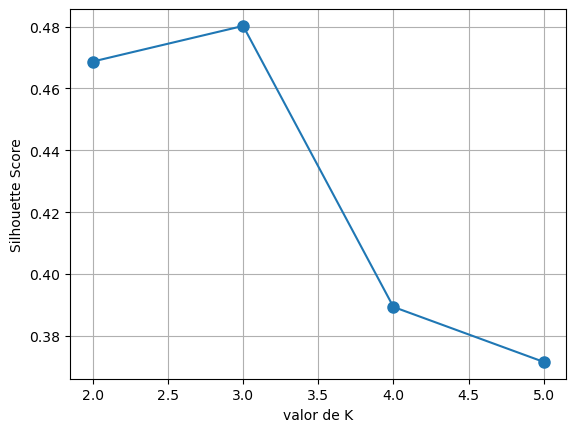

In [9]:
from sklearn.metrics import silhouette_score

Ks = range(2,6)
scores = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # TODO: Obten el silhouete score de nuestro modelo
    # ====== Start of solution =====
    score = silhouette_score(X, kmeans.labels_)

    # ====== End of solution =====
    scores.append(score)

plt.plot(Ks,scores,'-o', markersize=8)
plt.xlabel("valor de K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### TODO: Contesta la siguiente pregunta

De acuerdo al silhouete score
- ¿Qué sería mejor, elegir 4 o 5 clusters?

Elegir el de 4 clusters 

- ¿Cuántos clusters se deberían utilizar para entrenar el algoritmo? ¿Concuerda con tu selección realizada tras visualizar los datos?

Se deberían utilizar 3 clusters para entrenar al algoritmo. Si es la misma conclusión que habiamos obtenido. 

## 1.3 Rompiendo las asunciones de K-Means

K-means es un algoritmo que funciona en base a algunas asunciones que pueden no siempre ser ciertas, en esta seccion analizaremos algunos casos en los cuales el K-means puede que no genere la solución esperada.

In [10]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Círculos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas distintas": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

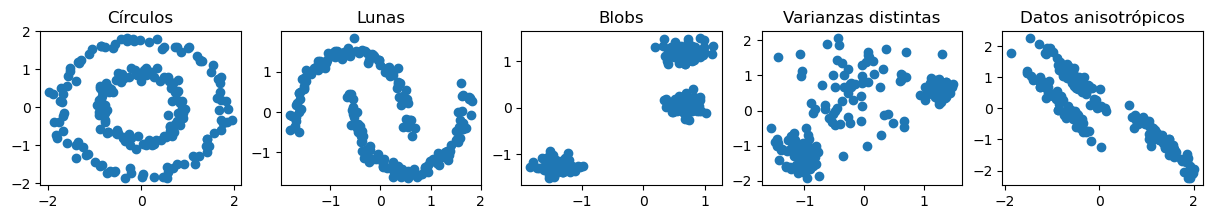

In [33]:
# ============
# Graficamos los datos
# ============
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)
    # TODO: Grafica los datos usando scatter
    # ====== Start of solution =====
    ax.scatter(X[:, 0], X[:, 1])

    # ====== End of solution =====
    ax.set_title(name)    

### Para los conjuntos de datos anteriores...
Aplica K-means a cada uno de los datasets anteriores. Determina los hiperparámetros (k) que resulten en la mejor asignación según tu criterio para cada grupo.
- ¿En que conjunto/os esperas que k-means realice una solución adecuada?
Para los conjuntos "Blobs" y "Varianzas distintas", se espera que K-means funcione adecuadamente ya que siguen la estructura de grupos bien definidos que K-means tiende a manejar bien.

- ¿Cuales son las asunciones de k-means?
K-means asume que los grupos son convexos, isotrópicos y de tamaño similar. Además, supone que la varianza en cada dimensión es igual.

- ¿Cual de estos conjuntos NO rompe las asunciones de k-means?
El conjunto "Blobs" probablemente no rompe las asunciones de K-means, ya que representa datos distribuidos en grupos bien definidos con varianzas similares y tamaños de grupo comparables, lo que cumple con las asunciones de K-means.


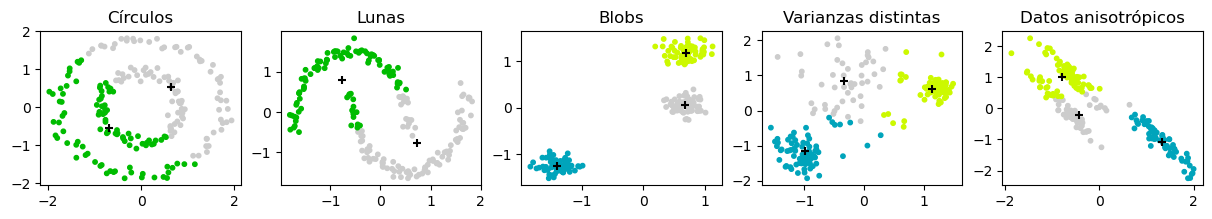

In [12]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica la cantidad de clusters para cada dataset hasta que encuentres un resultado que te satisfaga
n_clusters = {"Círculos": 2,
              "Lunas": 2,
              "Blobs": 3,
              "Varianzas distintas": 3,
              "Anisotrópicos": 3}
for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    # TODO: Aplica K-means para encontrar los grupos y los centros de cada cluster
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    # ====== End of solution =====
    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker="+", s=30, c='k')

## 2. DBScan
DBScan es otro método de agrupamiento el cual encuentra grupos que funciona a través de densidad local.
En las siguientes celdas, aplica DBScan a cada uno de los datasets anteriores y compara los resultados con los de K-Means. Ajusta los hiperparámetros según tu criterio para lograr un agrupamiento adecuado.

Clusteres en Círculos [0 1]
Clusteres en Lunas [0 1]
Clusteres en Blobs [0 1 2]
Clusteres en Varianzas distintas [-1  0]
Clusteres en Datos anisotrópicos [-1  0  1]


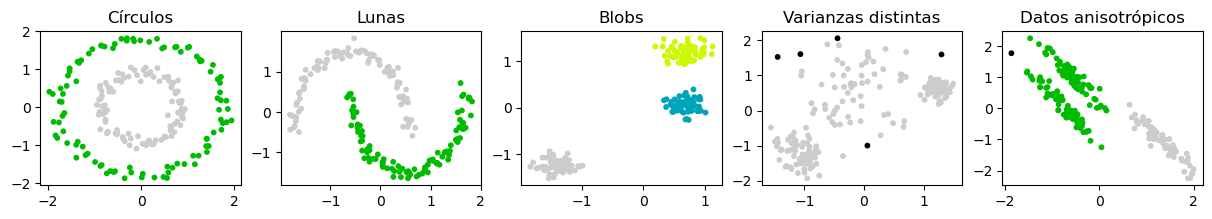

In [31]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Círculos": {"eps": 0.4, "min_samples": 5},
          "Lunas": {"eps": 0.4, "min_samples": 5},
          "Blobs": {"eps": 0.5, "min_samples": 5},
          "Varianzas distintas": {"eps": 0.5, "min_samples": 5},
          "Datos anisotrópicos": {"eps": 0.5, "min_samples": 4}}
for ((name, data), ax) in zip(datasets.items(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    eps = params[name]['eps']
    min_samples = params[name]['min_samples']
    # TODO: Aplica DBSCAN para encontrar los clusters
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    grupos = dbscan.fit_predict(X)
    # ====== End of solution =====
    print(f"Clusteres en {name}", np.unique(grupos))
    ax.scatter(X[:, 0], X[:, 1], s=10, c=grupos, vmin=-1)

### TODO: Contesta la siguientes preguntas
- ¿Qué diferencia encuentras entre los clusters encontrados con DBSCAN y los clusters encontrados con K-Means?

Basandonos en la teoría, DBSCAN encuentra clusters basándose en la densidad de puntos en el espacio, en cambio K-Means agrupa puntos en clusters de manera que la varianza sea mínima. Es por esto que notamos que en K-Means se agrupan por los centros y esto causa que en ocasiones se hagan grupos que aparenten estar partidos, mientras que en DBSCAN esto no pasa y además se incluyen mejor los puntos que estan aislados. 

- ¿Qué metodo clasifica mejor los clusters de Lunas y a qué crees que se deba?

DBSCAN porque funciona mejor para este tipo de formas irregulares y no se ve afectado por la forma no convexa de los datos.

- ¿Qué son los puntos negros encontrados con DBSCAN?

Estos representan ruido o puntos que no se asignan a ningún cluster. 

- ¿En qué casos crees que sea recomendable utilizar K-means sobre DBSCAN?

Creemos que K-Means es mas recomendabkle cuando se sabe el número de clusters y estos clusters son aproximadamente esféricos y de tamaño similar. También puede ser mejor en conjuntos de datos grandes.

- En base a tu experiencia ¿que desventajas notas para DBScan contra K-means?

DBSCAN puede tener desventajas con clusters de densidades diferentes, y elegir el parámetro eps puede ser difícil. También puede ser complicado usarlo para conjuntos de datos de alta dimensionalidad.

- En base a tu experiencia ¿que ventajas notas para DBScan contra K-means?

DBSCAN es mejor para encontrar clusters de formas y tamaños arbitrarios. También es mejor cuando no se requiere especificar el número de clusters previamente y puede identificar ruido.

- Si entrenamos DBSCAN y queremos buscar un grupo al que pertenezca un punto nuevo, ¿Existe alguna función de sk-learn que nos permita hacer esto?¿Cómo podríamos predecir el grupo al que pertenece un nuevo datapoint?

En scikit-learn, no hay una función específica para predecir el grupo al que pertenece un nuevo datapoint en DBSCAN, ya que DBSCAN no está diseñado para predecir en ese sentido. DBSCAN clasifica los puntos en clusters durante el proceso de ajuste y no se entrena para predecir para nuevos datapoints. Si se necesita predecir grupos para nuevos datos, K-Means sería más apropiado en ese escenario.





